In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

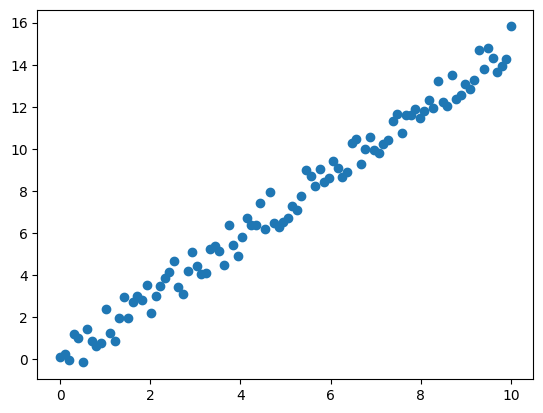

In [9]:
xs = np.linspace(0, 10, 100)
ys = 1.5*xs + np.random.random(100)*2-1

plt.scatter(xs, ys)
plt.show()

MSE: 0.3082
r2: 0.9836
Model coef: [1.47277467]


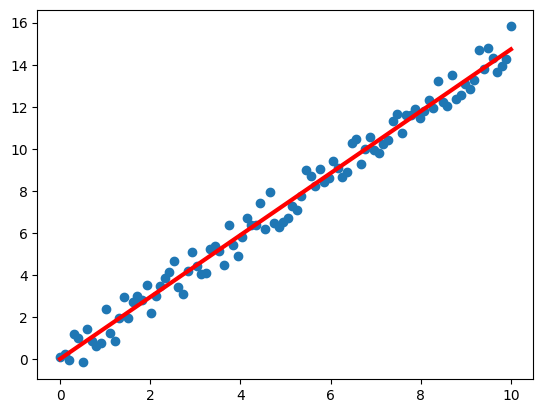

In [18]:
model = LinearRegression()
model.fit(xs.reshape(-1, 1), ys)
approx = model.predict(xs.reshape(-1, 1))

print(f'MSE: {mean_squared_error(ys, approx):.4f}\n'
      f'r2: {r2_score(ys, approx):.4f}\n'
      f'Model coef: {model.coef_}')

plt.scatter(xs, ys)
plt.plot(xs.reshape(-1, 1), approx, color='red', linewidth=3)
plt.show()

np.savetxt('ys.csv', ys, delimiter=',')
np.savetxt('approx.csv', approx, delimiter=',')

In [23]:
%%writefile test_data.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_ys():
    ys = np.loadtxt('ys.csv', delimiter=',')
    return(ys)

@pytest.fixture()
def load_approx():
    approx = np.loadtxt('approx.csv', delimiter=',')
    return(approx)

def test_mse(load_ys, load_approx):
    assert mean_squared_error(load_ys, load_approx) < 0.5

def test_r2(load_ys, load_approx):
    assert r2_score(load_ys, load_approx) > 0.9

Overwriting test_data.py


In [24]:
!pytest -v test_data.py

============================= test session starts =============================
platform win32 -- Python 3.13.2, pytest-8.3.5, pluggy-1.5.0 -- D:\projects\mlops\Scripts\python.exe
cachedir: .pytest_cache
rootdir: d:\projects\mlops_lab
collecting ... collected 2 items

test_data.py::test_mse PASSED                                            [ 50%]
test_data.py::test_r2 PASSED                                             [100%]

============================== 2 passed in 0.67s ==============================


MSE: 1.5889
r2: 0.9121
Model coef: [1.47277467]


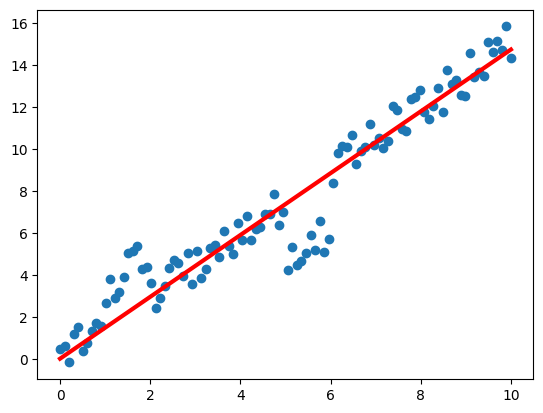

In [27]:
xs = np.linspace(0, 10, 100)
ys = 1.5*xs + np.random.random(100)*2-1
ys[10:20]+=2
ys[50:60]-=3

approx = model.predict(xs.reshape(-1, 1))

print(f'MSE: {mean_squared_error(ys, approx):.4f}\n'
      f'r2: {r2_score(ys, approx):.4f}\n'
      f'Model coef: {model.coef_}')

plt.scatter(xs, ys)
plt.plot(xs.reshape(-1, 1), approx, color='red', linewidth=3)
plt.show()

np.savetxt('ys.csv', ys, delimiter=',')
np.savetxt('approx.csv', approx, delimiter=',')

In [28]:
!pytest -v test_data.py

============================= test session starts =============================
platform win32 -- Python 3.13.2, pytest-8.3.5, pluggy-1.5.0 -- D:\projects\mlops\Scripts\python.exe
cachedir: .pytest_cache
rootdir: d:\projects\mlops_lab
collecting ... collected 2 items

test_data.py::test_mse FAILED                                            [ 50%]
test_data.py::test_r2 PASSED                                             [100%]

================================== FAILURES ===================================
__________________________________ test_mse ___________________________________

load_ys = array([ 0.48948458,  0.58682528, -0.17570801,  1.15850677,  1.49088087,
        0.39200542,  0.74156404,  1.31395016, ...459406, 13.64847375, 13.48147073, 15.10728155,
       14.60299178, 15.15315036, 14.68711517, 15.82974174, 14.32955171])
load_approx = array([4.73361033e-03, 1.53498728e-01, 3.02263846e-01, 4.51028964e-01,
       5.99794081e-01, 7.48559199e-01, 8.973243...1.38398896e+01, 1.39886

MSE: 2.7649
r2: 0.8575
Model coef: [1.47277467]


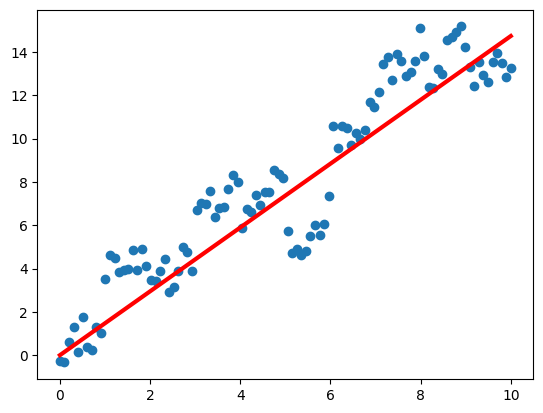

In [33]:
xs = np.linspace(0, 10, 100)
ys = 1.6*xs + np.random.random(100)*2-1
ys[10:20]+=2
ys[30:40]+=1.5
ys[50:60]-=3
ys[70:80]+=1.5
ys[90:100]-=2

approx = model.predict(xs.reshape(-1, 1))

print(f'MSE: {mean_squared_error(ys, approx):.4f}\n'
      f'r2: {r2_score(ys, approx):.4f}\n'
      f'Model coef: {model.coef_}')

plt.scatter(xs, ys)
plt.plot(xs.reshape(-1, 1), approx, color='red', linewidth=3)
plt.show()

np.savetxt('ys.csv', ys, delimiter=',')
np.savetxt('approx.csv', approx, delimiter=',')

In [34]:
!pytest -v test_data.py

============================= test session starts =============================
platform win32 -- Python 3.13.2, pytest-8.3.5, pluggy-1.5.0 -- D:\projects\mlops\Scripts\python.exe
cachedir: .pytest_cache
rootdir: d:\projects\mlops_lab
collecting ... collected 2 items

test_data.py::test_mse FAILED                                            [ 50%]
test_data.py::test_r2 FAILED                                             [100%]

================================== FAILURES ===================================
__________________________________ test_mse ___________________________________

load_ys = array([-0.2466294 , -0.33219265,  0.63163356,  1.28406327,  0.14433768,
        1.7519999 ,  0.38130431,  0.26073548, ...587058, 13.54407614, 12.92032515, 12.61864021,
       13.5380781 , 13.94294847, 13.50335348, 12.85846495, 13.24328321])
load_approx = array([4.73361033e-03, 1.53498728e-01, 3.02263846e-01, 4.51028964e-01,
       5.99794081e-01, 7.48559199e-01, 8.973243...1.38398896e+01, 1.39886